# Convolution Layer
- Previous examples of convolutions were used to distill vertical and horizontal information from the image.
- Consider how people see the world and classify objects. Instead of thinking about each 'pixels' of image and try to calculate the probability of individual pixels to be certain object, eye tries to capture some important characteristics of an image to notice the object.
    - Convolution layer is a great tool to find specific 'characteristic' of an image data, such as vertical, horizontal, curve, gradient, ect.
    - However, finding a correct shape of kernels is not an obvious task. This process of finding or developing the kernel to classify objects in this world might be equivalent to the process of babies growing.
    - It is computationally complex, but it can be model similar to any other neural network.
        - Instead of using constant kernel as before, if we set the kernel as a variable, we can use gradient descent method to find best kernels that classify the data.
        - Number of kernels or shape of each kernel can be also dynamically adjusted as a part of back-propagation.
        - This process is computationally large and complex, therefore we use more improvement techniques such as __pooling__, __dropout layer__, __ReLU cutout__.
        - Some pre-processing layers can be added, such as
            - normalizing dynamic range, auch as contrast
            - cropping: try to determine position of object in image
            - whitening: re-map the data from 0 to 1
        - To improve the resulting network, following approaches are also made for batched samples:
            - random cropping
            - random translating/flopping

In [3]:
# Settings
import keras

conv1_nKernel=32
conv2_nKernel=64
dense1_output=64
dense2_output=10
nCategories = 10

## Prepare CIFAR Dataset
- Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
- [Keras Datasets](https://keras.io/datasets/)

In [9]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(-1, 32*32, 3)
x_test = x_test.reshape(-1, 32*32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
t = y_train
y_train = keras.utils.to_categorical(y_train, nCategories)
y_test = keras.utils.to_categorical(y_test, nCategories)

### Dataset Viasualize

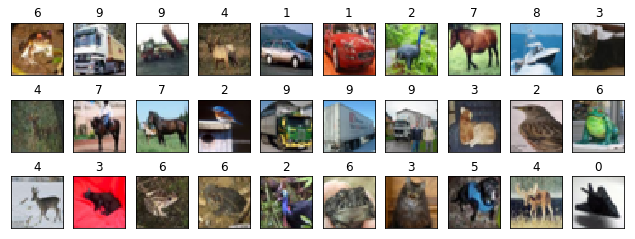

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(x_train[i].reshape(32,32,3), vmin=0, vmax=1,
                 interpolation='nearest')

In [12]:
x_train.shape

(50000, 1024, 3)

## Convolution Filter with Keras

In [15]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

In [16]:
# Build Layers
model = Sequential()

# First Convolution Layer (32 kernels)
model.add(Conv2D(conv1_nKernel, input_shape=(32,32,3),
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))
model.add(Conv2D(conv2_nKernel,
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))

# Pool
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(dense1_output, activation='tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'
               ))
model.add(Dense(dense2_output, activation='softmax',
               kernel_initializer='zeros',
               bias_initializer='zeros'
               ))

In [17]:
# Define Compiler
model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

## Training

In [19]:
model.fit(x_train.reshape(-1,32,32,3), y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 352s 7ms/step - loss: 1.7030 - acc: 0.3837
Epoch 2/10
50000/50000 [==============================] - 413s 8ms/step - loss: 1.2831 - acc: 0.5416
Epoch 3/10
50000/50000 [==============================] - 437s 9ms/step - loss: 1.0793 - acc: 0.6193
Epoch 4/10
50000/50000 [==============================] - 429s 9ms/step - loss: 0.9531 - acc: 0.6650
Epoch 5/10
50000/50000 [==============================] - 426s 9ms/step - loss: 0.8567 - acc: 0.7009
Epoch 6/10
50000/50000 [==============================] - 401s 8ms/step - loss: 0.7809 - acc: 0.7284
Epoch 7/10
50000/50000 [==============================] - 409s 8ms/step - loss: 0.7121 - acc: 0.7513
Epoch 8/10
50000/50000 [==============================] - 412s 8ms/step - loss: 0.6528 - acc: 0.7744
Epoch 9/10
50000/50000 [==============================] - 408s 8ms/step - loss: 0.5962 - acc: 0.7932
Epoch 10/10
50000/50000 [==============================] - 415s 8ms/step - loss: 0.5520 - a

## Prediction

In [21]:
result = model.evaluate(x_test.reshape(-1,32,32,3), y_test, verbose=1)
print('loss:', result[0], 'accuracy:', result[1])

loss: 0.9966686658859253 accuracy: 0.6782


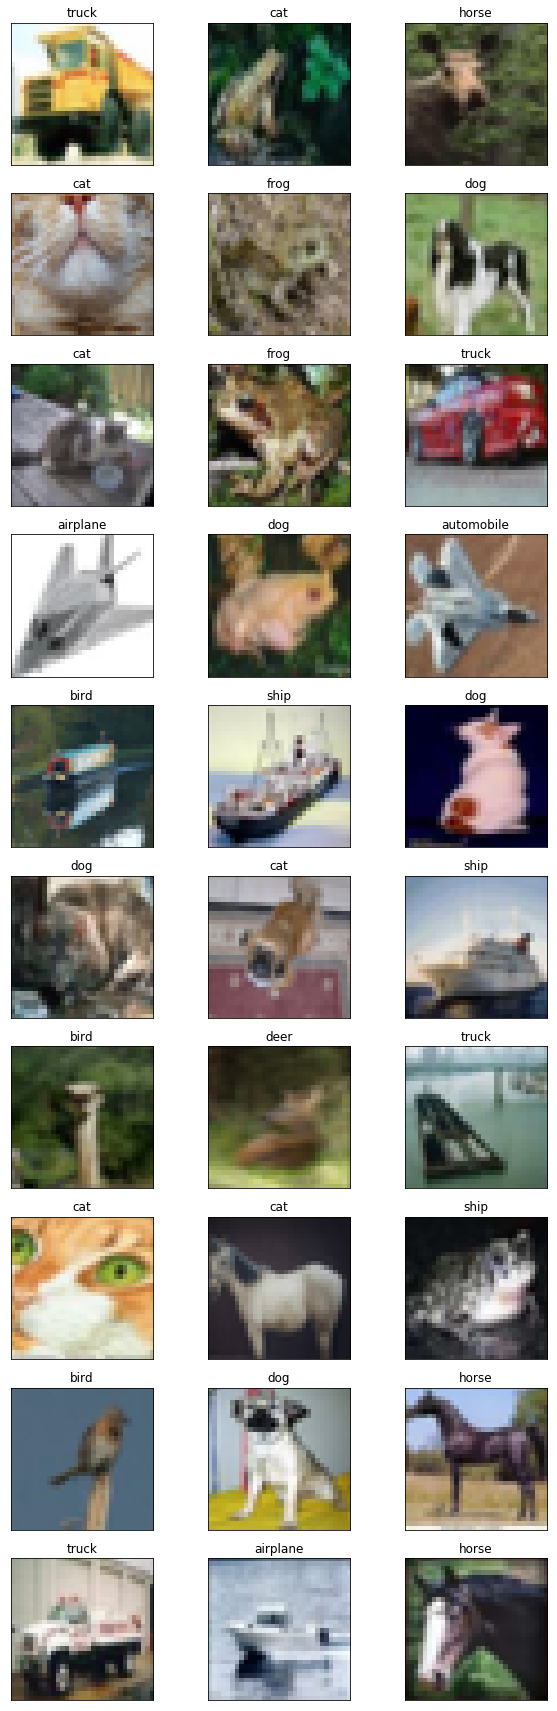

In [36]:
import matplotlib.pyplot as plt
import numpy as np

nShowSample = 30
names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

sampleInd = np.random.choice(x_test.shape[0], nShowSample)

x_sample = x_sample = x_test[sampleInd]
y_sample = y_sample = y_test[sampleInd]

pred = model.predict(x_sample.reshape(-1,32,32,3))

nCol = 3
nRow = int(nShowSample/nCol)+1
w, h = 3, 3
fig = plt.figure(figsize=( (nCol*w)+1, (nRow*h)+1))

for i in range(nShowSample):
    subplot = fig.add_subplot(nRow, nCol, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    predictedInd = np.argmax(pred[i])
    subplot.set_title('%s' % names[predictedInd])
    subplot.imshow(x_sample[i].reshape(32,32,3), vmin=0, vmax=1,
                 interpolation='nearest')